# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [744]:
#Load libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [745]:
#load the twitter-archive-enhanced data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [746]:
#generate request with the url provided
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

#write content of the response to a file named image_predictions
with open('image_predictions', mode='wb') as file:
    file.write(response.content)
    
#load contents of the file into a dataframe
image_predictions = pd.read_csv('image_predictions', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [747]:
#create an empty list
tweet_meta_data = []

#open and and create a loop to read file line by line from the tweet_json.txt
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        #create a dictionary and append it to the list
        tweet_meta_data.append({'tweets':tweets, 'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})

#convert the dictionary to a dataframe
tweet_meta_data = pd.DataFrame(tweet_meta_data, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [545]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
608,797971864723324932,NaN,NaN,2016-11-14 01:18:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797971864...,12,10,None,None,None,pupper,None
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398...,13,10,None,None,None,None,None
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007...,10,10,None,None,None,None,None
270,841314665196081154,NaN,NaN,2017-03-13 15:47:01 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Max. There's no way in h*ck you're tak...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841314665...,13,10,Max,None,None,None,None


In [70]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,pug,0.985237,True,bull_mastiff,0.008841,True,boxer,0.002321,True
1220,743980027717509120,https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg,1,bull_mastiff,0.975730,True,Rhodesian_ridgeback,0.008073,True,pug,0.005571,True
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
174,669015743032369152,https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg,1,comic_book,0.275927,False,bib,0.173516,False,jersey,0.073911,False
1748,823581115634085888,https://pbs.twimg.com/media/C23ypm6VQAAO31l.jpg,1,dingo,0.280949,False,German_shepherd,0.194044,True,Pembroke,0.120051,True
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True
777,689835978131935233,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,1,collie,0.600186,True,Shetland_sheepdog,0.298939,True,borzoi,0.022616,True
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
468,675109292475830276,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,dalmatian,0.989519,True,English_setter,0.005258,True,German_short-haired_pointer,0.001443,True


In [37]:
tweet_meta_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [26]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
tweet_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [61]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [33]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [35]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [39]:
tweet_meta_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [41]:
sum(twitter_archive.duplicated())

0

In [42]:
sum(image_predictions.duplicated())

0

In [43]:
sum(tweet_meta_data.duplicated())

0

### Quality issues
1. Incorrect datatype for timestamp in the twitter_archive table

2. Text column should contain _tweets_ only, and not _retweets_

3. Columns with missing records in the twitter_archive table

4. The stage columns in the twitter_archive table have "None" values

5. Incomplete and None values of dog names in the twitter_archive table

6. Incorrect input of ratings i.e. both numerator and denominator in the twitter_archive table

7. Source column in the twitter_archive not easy to read 

8. Inconsistent upper, lower, space and special case characters in the p1, p2 and p3 columns in the image_predictions table

9. Some of the images in the _jpg_url_ column of the image_predictions table are not images of dogs

### Tidiness issues
1. Doggo, floofer, puppo and pupper should be in one column

2. There's no conscise breed of dog

3. Join the three tables together

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [748]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_meta_data_clean = tweet_meta_data.copy()

### 1. Incorrect datatype :

#### Define:
Change the datatype of timestamp from _object_ to _datetime_:

#### Code

In [749]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [650]:
twitter_archive_clean['timestamp'].dtype

datetime64[ns, UTC]

### 2. `Text` column contains records of _retweets_

#### Define:
Remove records of retweets from the text column and then drop all columns associated with retweets

#### Code

In [750]:
# filter retweet columns with non-null rows
retweet = twitter_archive_clean[pd.notnull(twitter_archive_clean['retweeted_status_id'])].index
reply = twitter_archive_clean[pd.notnull(twitter_archive_clean['in_reply_to_status_id'])].index

In [751]:
# drop rows
twitter_archive_clean.drop(index=retweet, inplace=True)
twitter_archive_clean.drop(index=reply, inplace=True)

#### Test

In [456]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### 3. Missing and unuseful records:

#### Define:
Drop all columns with missing records from the `twitter_archive_clean` table, which is therein not useful in analysis

#### Code

In [752]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], inplace=True)

#### Test

In [753]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


### 4. `None` values instead of `Nan`

#### Define:
Replace None with Nan in all the dog stage coulmns

#### Code

In [754]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    twitter_archive_clean[stage] = twitter_archive_clean[stage].replace('None', np.nan)

#### Test

In [359]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN


### 5. Incomplete and None values of dog names (_a, all, None, an, his, etc_)

#### Define:
Replace the the above words with `Nan`

#### Code

In [755]:
# create a function to get all the non-dog names
empty_name =set()
for x in twitter_archive_clean['name']:
    if x[0].islower():
        empty_name.add(x)
wrong_names = list((empty_name))+['None']  

# replace wrong_names with Nan
twitter_archive_clean['name'].replace(wrong_names, np.nan, inplace=True)

#### Test

In [756]:
twitter_archive_clean['name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 929, dtype: int64

### 6. Incorrect input of numerator and denominator ratings 

#### Define:
Extract and split the numerator and denominator ratings from the `text` column using `regular expressions` and `.str.extract` and `.str.split`

#### Code

In [757]:
# numerator ratings
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['text'].str.extract('(\d+\.*\/\d+)', expand=False).str.split('/').str[0]

In [758]:
# denominator ratings
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['text'].str.extract('(\d+\.*\/\d+)', expand=False).str.split('/').str[1]

#### Test

In [759]:
twitter_archive_clean['rating_numerator'].head(10)

0    13
1    13
2    12
3    13
4    12
5    13
6    13
7    13
8    13
9    14
Name: rating_numerator, dtype: object

In [760]:
twitter_archive_clean['rating_denominator'].head(10)

0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
8    10
9    10
Name: rating_denominator, dtype: object

### 7. Source column not easy to read

#### Define:
Extract source of tweets from the column (e.g. `twitter for iphone`) using `regular expressions` and `.str.extract`

#### Code

In [761]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [389]:
twitter_archive_clean['source'].sample(10)

545     Twitter for iPhone
796     Twitter for iPhone
157     Twitter for iPhone
2133    Twitter for iPhone
1138    Twitter for iPhone
2057    Twitter for iPhone
719     Twitter for iPhone
1654    Twitter for iPhone
2268    Twitter Web Client
624     Twitter for iPhone
Name: source, dtype: object

### 8. Inconsistent naming of breeds of dog (p1, p2, p3)

#### Define:
Replace spaces with underscores, and upper case characters with lower case characters

#### Code

In [762]:
image_predictions_clean['p1'] = image_predictions_clean.p1.str.lower().replace('\s+', '_', regex=True).fillna(image_predictions_clean['p1'])
image_predictions_clean['p2'] = image_predictions_clean.p1.str.lower().replace('\s+', '_', regex=True).fillna(image_predictions_clean['p2'])
image_predictions_clean['p3'] = image_predictions_clean.p1.str.lower().replace('\s+', '_', regex=True).fillna(image_predictions_clean['p3'])

#### Test

In [766]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
702,684902183876321280,https://pbs.twimg.com/media/CYFC5lmWAAAEIho.jpg,1,pembroke,0.708034,True,pembroke,0.291447,True,pembroke,0.000185,False
604,679854723806179328,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,1,llama,0.887963,False,llama,0.095021,False,llama,0.002307,True
1617,802323869084381190,https://pbs.twimg.com/media/CyJtSmDUAAA2F9x.jpg,4,home_theater,0.765069,False,home_theater,0.203578,False,home_theater,0.018644,False
1160,734776360183431168,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,1,siberian_husky,0.304902,True,siberian_husky,0.155147,True,siberian_husky,0.050942,True
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,tibetan_mastiff,0.338812,True,tibetan_mastiff,0.180925,True,tibetan_mastiff,0.180023,True


### 9. Non-dog images

#### Define:
Query all the "False" predictions of _p1_dog, p2_dog and p3_dog_ columns and drop them

#### Code

In [767]:
non_dog = image_predictions_clean.query('p1_dog==False or p2_dog==False or p3_dog==False').index

In [768]:
image_predictions_clean.drop(non_dog, inplace=True)

#### Test

In [769]:
len(image_predictions_clean.query('p1_dog==False or p2_dog==False or p3_dog==False'))

0

In [770]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
36,666447344410484738,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,curly-coated_retriever,0.322084,True,curly-coated_retriever,0.287955,True,curly-coated_retriever,0.166331,True
121,668204964695683073,https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg,1,labrador_retriever,0.655180,True,labrador_retriever,0.107884,True,labrador_retriever,0.065835,True
547,677331501395156992,https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg,1,beagle,0.313464,True,beagle,0.218503,True,beagle,0.106462,True
86,667517642048163840,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,italian_greyhound,0.125176,True,italian_greyhound,0.084571,True,italian_greyhound,0.081347,True
184,669354382627049472,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,1,chihuahua,0.973990,True,chihuahua,0.010832,True,chihuahua,0.002099,True


### 10. Three variables in one column in the `twitter_archive_clean` table (_dog_stage_)

#### Define:
Combine the _doggo, floofer, pupper_ and _puppo_ columns into a new column called `dog_stage`. Then drop the four columns.

#### Code

In [771]:
# create a new column for dog_stage to represent dog stages by combining relevant columns
twitter_archive_clean['dog_stage'] = twitter_archive_clean[twitter_archive_clean.columns[7:]].apply(lambda x:','.join(x.dropna().astype(str)), axis=1)
#replace the Nan rows with None for easy readability 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('', 'None')

In [772]:
#drop columns
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [773]:
twitter_archive_clean['dog_stage'].value_counts()

None             1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### 11. Three variables (p1, p2, p3) into one column to get the actual breed of dog

#### Define:
Create a function to get the likely breed of dog from the three predictions

#### Code

In [774]:
#Create a function for the most likely breed of dog
def dog_breed(x):
    if x[0]==True:
        return x[1]
    elif x[2]==True:
        return x[3]
    else:
        return x[4]
    
    
image_predictions_clean['breed'] = image_predictions_clean[['p1_dog', 'p1', 'p2_dog', 'p2', 'p3', 'p3_dog']].apply(dog_breed, axis=1)   

In [775]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
1614,802239329049477120,https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg,2,eskimo_dog,0.482498,True,eskimo_dog,0.335774,True,eskimo_dog,0.134589,True,eskimo_dog
1204,741743634094141440,https://pbs.twimg.com/media/Cksz42EW0AAh2NF.jpg,1,labrador_retriever,0.786089,True,labrador_retriever,0.048652,True,labrador_retriever,0.034693,True,labrador_retriever
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,toy_poodle,0.142073,True,toy_poodle,0.125745,True,toy_poodle
1200,740995100998766593,https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg,1,malamute,0.454363,True,malamute,0.215967,True,malamute,0.077500,True,malamute
720,685943807276412928,https://pbs.twimg.com/ext_tw_video_thumb/68594...,1,papillon,0.200812,True,papillon,0.114512,True,papillon,0.094520,True,papillon


#### Test

In [776]:
image_predictions_clean['breed'].value_counts()

golden_retriever       126
pembroke                78
labrador_retriever      77
chihuahua               54
pug                     41
                      ... 
appenzeller              1
standard_schnauzer       1
scotch_terrier           1
entlebucher              1
irish_water_spaniel      1
Name: breed, Length: 110, dtype: int64

### 12. Merging of tables (_twitter_archive_clean, image_predictions_clean, tweet_meta_data_)

#### Define:
Merge the _tweet_meta_data_clean_ table with the _twitter_archive_clean_ and _image_predictions_clean on `tweet_id`

#### Code

In [777]:
# merge tweet_meta_data_clean, twitter_archive_clean and image_predictions
tweet_data = twitter_archive_clean.merge(tweet_meta_data_clean, on='tweet_id', how='inner').merge(image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [778]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 1193
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1194 non-null   int64              
 1   timestamp           1194 non-null   datetime64[ns, UTC]
 2   source              1194 non-null   object             
 3   text                1194 non-null   object             
 4   rating_numerator    1194 non-null   object             
 5   rating_denominator  1194 non-null   object             
 6   name                852 non-null    object             
 7   dog_stage           1194 non-null   object             
 8   retweet_count       1194 non-null   int64              
 9   favorite_count      1194 non-null   int64              
 10  jpg_url             1194 non-null   object             
 11  img_num             1194 non-null   int64              
 12  p1                  1194 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [779]:
tweet_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

> dog breeds with the most average likes `(favorite_count)`

In [783]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [786]:
most_liked = twitter_archive_master.groupby('breed')['favorite_count'].mean().sort_values(ascending=False)
most_liked.head(10)

breed
irish_water_spaniel        25225.000000
saluki                     24060.000000
standard_poodle            20541.000000
french_bulldog             18621.000000
giant_schnauzer            17314.500000
black-and-tan_coonhound    17012.000000
flat-coated_retriever      16791.625000
english_springer           15657.222222
cardigan                   15459.857143
leonberg                   14934.333333
Name: favorite_count, dtype: float64

> Dog breeds with the most average retweets

In [785]:
most_liked = twitter_archive_master.groupby('breed')['retweet_count'].mean().sort_values(ascending=False)
most_liked.head(10)

breed
standard_poodle        8846.600000
irish_water_spaniel    6039.000000
english_springer       5973.555556
eskimo_dog             5747.500000
lakeland_terrier       5239.076923
giant_schnauzer        5161.500000
saluki                 5133.750000
samoyed                5108.920000
french_bulldog         5018.850000
great_pyrenees         4953.307692
Name: retweet_count, dtype: float64

> Most popular dog names

In [787]:
twitter_archive_master['name'].value_counts().head(5)

Cooper     9
Charlie    8
Oliver     7
Sadie      6
Koda       6
Name: name, dtype: int64

> Dog breeds with the highest average rating

In [784]:
highest_rating = twitter_archive_master.groupby('breed')['rating_numerator'].mean().sort_values(ascending=False)
highest_rating.head(10)

breed
clumber                        27.000000
west_highland_white_terrier    17.454545
borzoi                         17.200000
soft-coated_wheaten_terrier    16.222222
great_pyrenees                 15.153846
labrador_retriever             14.824324
siberian_husky                 13.647059
saluki                         12.500000
golden_retriever               12.393162
irish_setter                   12.333333
Name: rating_numerator, dtype: float64

> Devices used for tweets

In [788]:
twitter_archive_master['source'].value_counts()

Twitter for iPhone    1175
Twitter Web Client      14
TweetDeck                5
Name: source, dtype: int64

### Insights:
1. It was seen that standard the `clumber` breed had the highest average rating


2. Another notable insight was that, the numerator rating barely has a positive correlation to that of the favourite count, hence the `irish_water_speniel` having the most average favourite count


3. There is a positive correlation between retweets and favorites, thus, the higher the retweets on a post, the higher the probability that post would be liked

### Visualization

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

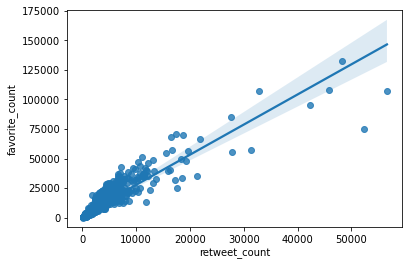

In [739]:
# Correlation between retweet_count and favorite_count
sns.regplot(x = tweet_data['retweet_count'], y = tweet_info['favorite_count'])